In [13]:
#conda install -c conda-forge tensorflow

!pip install tensorflow


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np



In [17]:
#Loading data
data=pd.read_csv("C:\\Users\\ellaa\\OneDrive\\Desktop\\DISCOVERY DIABETES\\FINAL ML PROJECT\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [19]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [23]:
# List of columns to drop
columns_to_drop = [
     'DiffWalk', 'CholCheck', 'GenHlth','AnyHealthcare', 'NoDocbcCost','MentHlth', 'PhysHlth'
]

# Drop all specified columns at once, ignoring errors if any column is missing
data = data.drop(columns=columns_to_drop, errors='ignore')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  Sex                   70692 non-null  float64
 12  Age                   70692 non-null  float64
 13  Education             70692 non-null  float64
 14  Income                70692 non-null  float64
dtypes: float64(15)
memo

In [27]:
# Renaming columns


data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})
data = data.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})
data = data.rename(columns={'HvyAlcoholConsump': 'AlcoholConsum'})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_Status  70692 non-null  float64
 1   HighBP           70692 non-null  float64
 2   HighChol         70692 non-null  float64
 3   BMI              70692 non-null  float64
 4   Smoker           70692 non-null  float64
 5   Stroke           70692 non-null  float64
 6   HeartDisease     70692 non-null  float64
 7   PhysActivity     70692 non-null  float64
 8   Fruits           70692 non-null  float64
 9   Veggies          70692 non-null  float64
 10  AlcoholConsum    70692 non-null  float64
 11  Sex              70692 non-null  float64
 12  Age              70692 non-null  float64
 13  Education        70692 non-null  float64
 14  Income           70692 non-null  float64
dtypes: float64(15)
memory usage: 8.1 MB


In [31]:
##DATA EXPLORATORY PHASE

['Males' 'Females']


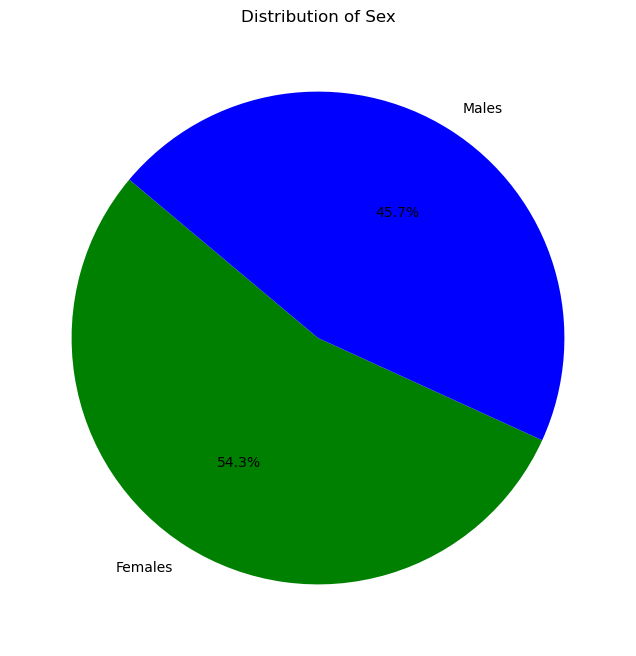

In [100]:
# Replace 1 with 'Males' and 0 with 'Females' in the 'Sex' column directly
data['Sex'] = data['Sex'].replace({1: 'Males', 0: 'Females'})

# Check the unique values in the 'Sex' column
print(data['Sex'].unique())

# Count the occurrences of each sex
sex_counts = data['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors= ['green', 'blue'])
plt.title('Distribution of Sex')
plt.savefig("pie.jpeg")
plt.show()



In [104]:
plt.savefig(("C:\\Users\\ellaa\\OneDrive\\Desktop\\DISCOVERY DIABETES\\FINAL ML PROJECT\\pie.jpeg"))

<Figure size 640x480 with 0 Axes>

In [37]:
# Replace 1 with 'Males' and 0 with 'Females' in the 'Sex' column directly
data['Sex'] = data['Sex'].replace({'Males':1,'Females':0})


C:\Users\ellaa\AppData\Local\Temp\ipykernel_21116\1622331223.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'Males':1,'Females':0})


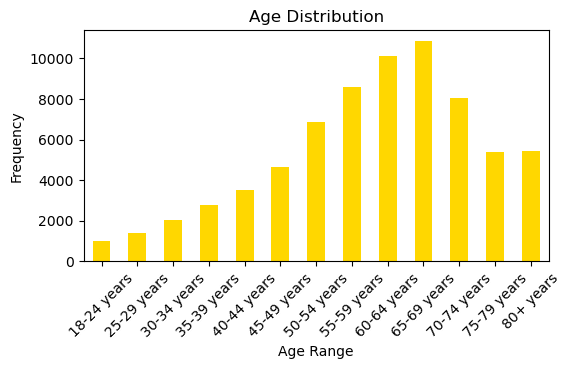

In [39]:
# Define the age mapping
age_mapping = {
    1: '18-24 years',
    2: '25-29 years',
    3: '30-34 years',
    4: '35-39 years',
    5: '40-44 years',
    6: '45-49 years',
    7: '50-54 years',
    8: '55-59 years',
    9: '60-64 years',
    10: '65-69 years',
    11: '70-74 years',
    12: '75-79 years',
    13: '80+ years'
}

# Map the age codes to age ranges
data['Age_Range'] = data['Age'].map(age_mapping)

# Plot the histogram
plt.figure(figsize=(6, 3))
data['Age_Range'].value_counts().sort_index().plot(kind='bar', color='gold')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Seperating the Dependent and Independent Variables
X=data.drop(['Diabetes_Status'],axis=1)
y=data['Diabetes_Status']

In [43]:
# Replace 1 with 'Males' and 0 with 'Females' in the 'Sex' column directly
X['Sex'] = X['Sex'].replace({'Males':1,'Females':0})

In [210]:
X.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,Veggies,AlcoholConsum,Sex,Age,Education,Income
0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,4.0,6.0,8.0
1,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,12.0,6.0,8.0
2,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,13.0,6.0,8.0
3,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,11.0,6.0,8.0
4,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,8.0,5.0,8.0


In [45]:
data.drop(['Age_Range'],axis=1, inplace=True)

In [47]:
# Building Predictive Model


In [49]:
X = pd.get_dummies(X, drop_first=True)  #exclude bmi or drop bmi from x

In [51]:
X

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,Veggies,AlcoholConsum,...,Age_Range_35-39 years,Age_Range_40-44 years,Age_Range_45-49 years,Age_Range_50-54 years,Age_Range_55-59 years,Age_Range_60-64 years,Age_Range_65-69 years,Age_Range_70-74 years,Age_Range_75-79 years,Age_Range_80+ years
0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,False
70688,0.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False
70689,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
70690,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)



#predicting our test values
outcome_pred = knn.predict(X_test)
       
accuracy = accuracy_score(y_test, outcome_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.678564692568842


In [55]:
# Initialize the Decision Tree classifier

dt = DecisionTreeClassifier(random_state=8)

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

In [56]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6435307431158054


In [57]:
# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65     10650
         1.0       0.65      0.62      0.63     10558

    accuracy                           0.64     21208
   macro avg       0.64      0.64      0.64     21208
weighted avg       0.64      0.64      0.64     21208

[[7112 3538]
 [4022 6536]]


In [58]:
# Initialize the RandomForestClassifier with default parameters or adjust n_estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators and other parameters

# Fit the Random Forest model to the scaled training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7067144473783478


In [60]:
# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=3, max_iter=1000)  # Adjust max_iter if you get convergence warnings

# Fit the Logistic Regression model to the scaled training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)print(f"Accuracy: {accuracy}")

SyntaxError: invalid syntax (4256785928.py, line 11)

In [ ]:

# Initialize the AdaBoostClassifier with default parameters
ada = AdaBoostClassifier(n_estimators=50, random_state=3)  # Adjust n_estimators for tuning if needed

# Fit the AdaBoost model to the scaled training data
ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:


# Initialize AdaBoostClassifier with the SAMME algorithm
ada = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=3)

# Fit the AdaBoost model to the scaled training data
ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:


# Initialize GradientBoostingClassifier with default parameters
gb = GradientBoostingClassifier(n_estimators=50, random_state=3)  # You can tune n_estimators and other parameters

# Fit the Gradient Boosting model to the scaled training data
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
data.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the learning rate scheduler
data.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler

# Define your model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax')  # Output layer, assuming 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define your learning rate scheduler
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * (0.1 ** (epoch // 10)))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

C:\Users\ellaa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6810 - loss: 0.6200 - val_accuracy: 0.7325 - val_loss: 0.5354 - learning_rate: 0.0010
Epoch 2/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7275 - loss: 0.5442 - val_accuracy: 0.7384 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 3/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7267 - loss: 0.5407 - val_accuracy: 0.7348 - val_loss: 0.5354 - learning_rate: 0.0010
Epoch 4/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7325 - loss: 0.5393 - val_accuracy: 0.7346 - val_loss: 0.5307 - learning_rate: 0.0010
Epoch 5/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7344 - loss: 0.5349 - val_accuracy: 0.7364 - val_loss: 0.5301 - learning_rate: 0.0010
Epoch 6/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7321 - loss: 0.5337 - val_accuracy: 0.7342 - val_loss: 0.5415 - learning_rate: 0.0010
Epoch 7/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7295 - l


KeyboardInterrupt



C:\Users\ellaa\AppData\Local\Temp\ipykernel_21116\1866963245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Diabetes_Status', data=data, palette= [ 'green', 'blue'], edgecolor= 'black')


<function matplotlib.pyplot.show(close=None, block=None)>

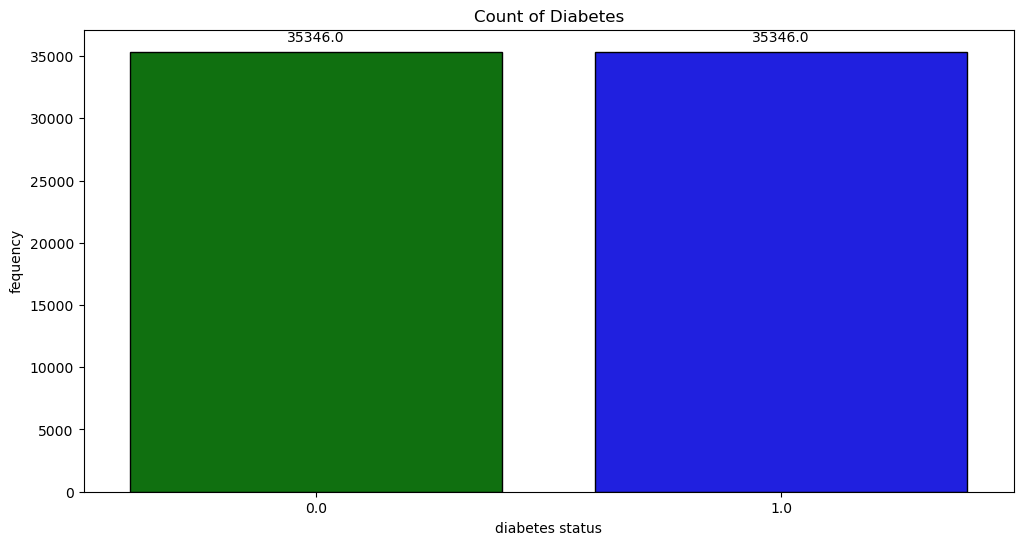

In [68]:
#visualizing data on count diabetes cases
plt.figure(figsize=(12,6)) 
ax=sns.countplot(x='Diabetes_Status', data=data, palette= [ 'green', 'blue'], edgecolor= 'black')
plt.title('Count of Diabetes')
plt.xlabel('diabetes status')
plt.ylabel('fequency')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0,10), textcoords='offset points')
plt.show

C:\Users\ellaa\AppData\Local\Temp\ipykernel_21116\1815323822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_health['BMI_category'] = pd.cut(df_health['BMI'], bins=[0, 18.5, 24.9, 29.9, 40],


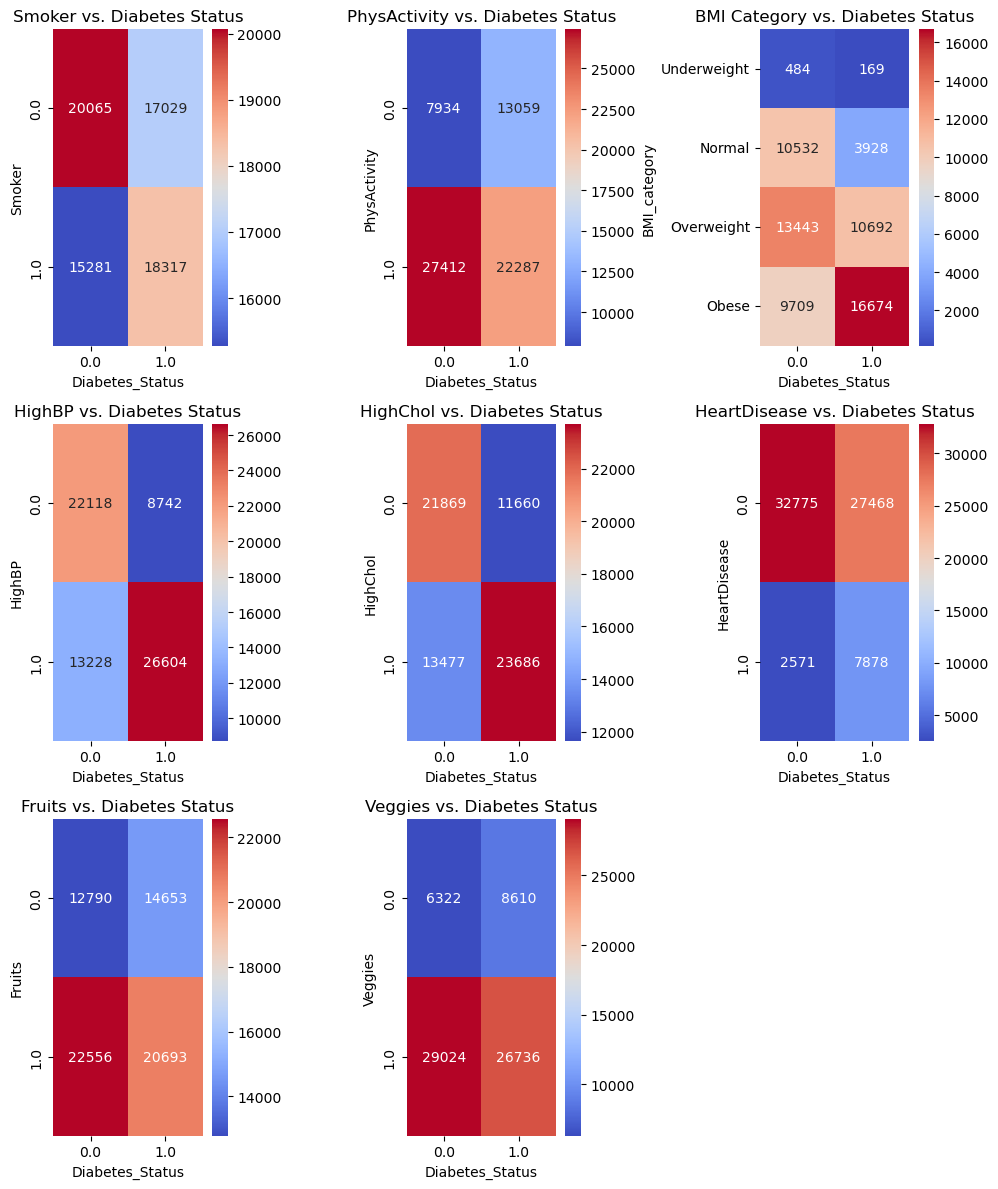

<Figure size 640x480 with 0 Axes>

In [70]:
# Select relevant columns for analysis
health_indicators = ['BMI', 'PhysActivity', 'Smoker', 'HighBP', 'HighChol', 'HeartDisease', 
                     'Fruits', 'Veggies', 'Diabetes_Status']

# Filter the dataframe to only include relevant health indicators and diabetes status
df_health = data[health_indicators]

# Categorize BMI into ranges if it is continuous
df_health['BMI_category'] = pd.cut(df_health['BMI'], bins=[0, 18.5, 24.9, 29.9, 40], 
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Crosstabs for each indicator vs. Diabetes_Status
crosstab_smoker_diabetes = pd.crosstab(df_health['Smoker'], df_health['Diabetes_Status'])
crosstab_physactivity_diabetes = pd.crosstab(df_health['PhysActivity'], df_health['Diabetes_Status'])
crosstab_bmi_diabetes = pd.crosstab(df_health['BMI_category'], df_health['Diabetes_Status'])
crosstab_highbp_diabetes = pd.crosstab(df_health['HighBP'], df_health['Diabetes_Status'])
crosstab_highchol_diabetes = pd.crosstab(df_health['HighChol'], df_health['Diabetes_Status'])
crosstab_heartdisease_diabetes = pd.crosstab(df_health['HeartDisease'], df_health['Diabetes_Status'])
crosstab_fruits_diabetes = pd.crosstab(df_health['Fruits'], df_health['Diabetes_Status'])
crosstab_veggies_diabetes = pd.crosstab(df_health['Veggies'], df_health['Diabetes_Status'])

# Plot heatmaps for each crosstab
plt.figure(figsize=(10, 12))

# Plot the crosstab between 'Smoker' and 'Diabetes_Status'
plt.subplot(3, 3, 1)
sns.heatmap(crosstab_smoker_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Smoker vs. Diabetes Status")

# Plot the crosstab between 'PhysActivity' and 'Diabetes_Status'
plt.subplot(3, 3, 2)
sns.heatmap(crosstab_physactivity_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("PhysActivity vs. Diabetes Status")

# Plot the crosstab between 'BMI_category' and 'Diabetes_Status'
plt.subplot(3, 3, 3)
sns.heatmap(crosstab_bmi_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("BMI Category vs. Diabetes Status")

# Plot the crosstab between 'HighBP' and 'Diabetes_Status'
plt.subplot(3, 3, 4)
sns.heatmap(crosstab_highbp_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HighBP vs. Diabetes Status")

# Plot the crosstab between 'HighChol' and 'Diabetes_Status'
plt.subplot(3, 3, 5)
sns.heatmap(crosstab_highchol_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HighChol vs. Diabetes Status")

# Plot the crosstab between 'HeartDisease' and 'Diabetes_Status'
plt.subplot(3, 3, 6)
sns.heatmap(crosstab_heartdisease_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HeartDisease vs. Diabetes Status")

# Plot the crosstab between 'Fruits' and 'Diabetes_Status'
plt.subplot(3, 3, 7)
sns.heatmap(crosstab_fruits_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Fruits vs. Diabetes Status")

# Plot the crosstab between 'Veggies' and 'Diabetes_Status'
plt.subplot(3, 3, 8)
sns.heatmap(crosstab_veggies_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Veggies vs. Diabetes Status")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save the graph as a high-resolution image
plt.savefig('sample_plot.png', dpi=300, bbox_inches='tight')



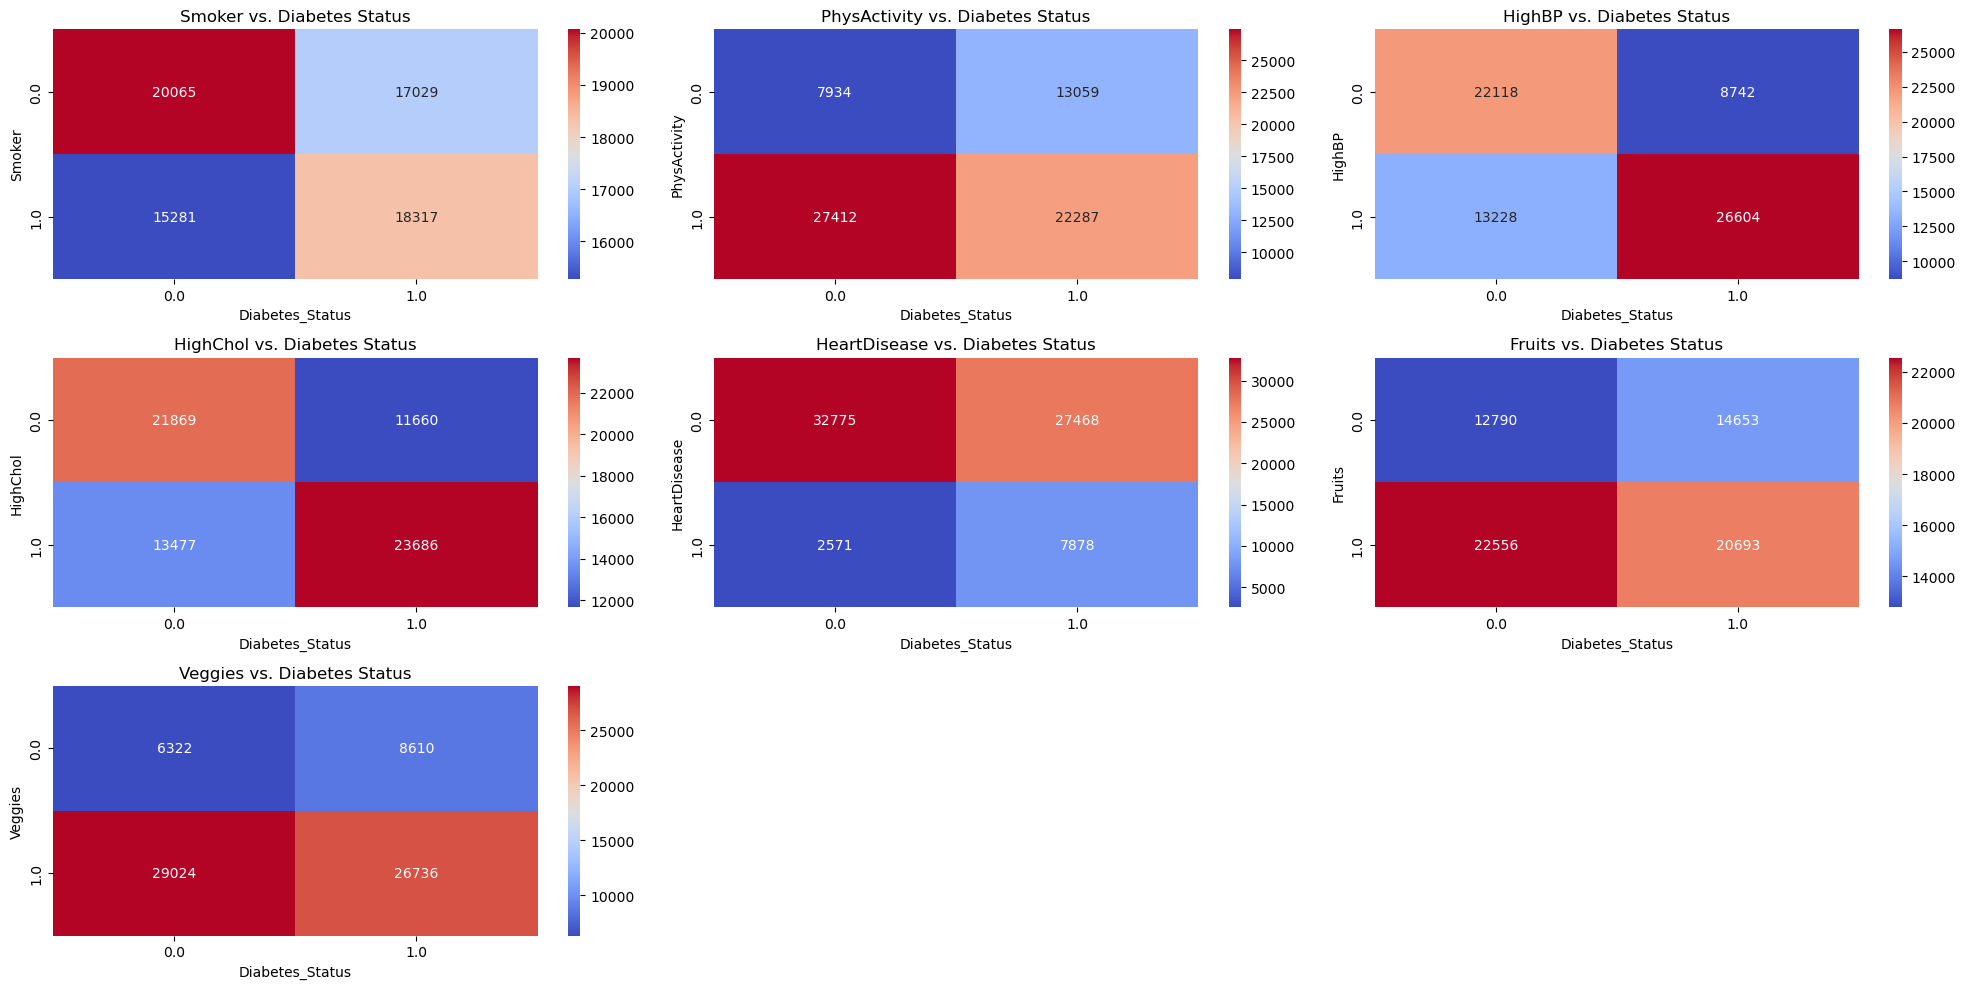

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ellaa\\Desktop\\sex_distribution_pie_chart.png'

<Figure size 640x480 with 0 Axes>

In [74]:
# Select relevant columns for analysis, excluding 'BMI'
health_indicators = ['PhysActivity', 'Smoker', 'HighBP', 'HighChol', 'HeartDisease', 
                     'Fruits', 'Veggies', 'Diabetes_Status']

# Filter the dataframe to only include relevant health indicators and diabetes status
df_health = data[health_indicators]

# Crosstabs for each indicator vs. Diabetes_Status
crosstab_smoker_diabetes = pd.crosstab(df_health['Smoker'], df_health['Diabetes_Status'])
crosstab_physactivity_diabetes = pd.crosstab(df_health['PhysActivity'], df_health['Diabetes_Status'])
crosstab_highbp_diabetes = pd.crosstab(df_health['HighBP'], df_health['Diabetes_Status'])
crosstab_highchol_diabetes = pd.crosstab(df_health['HighChol'], df_health['Diabetes_Status'])
crosstab_heartdisease_diabetes = pd.crosstab(df_health['HeartDisease'], df_health['Diabetes_Status'])
crosstab_fruits_diabetes = pd.crosstab(df_health['Fruits'], df_health['Diabetes_Status'])
crosstab_veggies_diabetes = pd.crosstab(df_health['Veggies'], df_health['Diabetes_Status'])

# Plot heatmaps for each crosstab
plt.figure(figsize=(20, 10))

# Plot the crosstab between 'Smoker' and 'Diabetes_Status'
plt.subplot(3, 3, 1)
sns.heatmap(crosstab_smoker_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Smoker vs. Diabetes Status")

# Plot the crosstab between 'PhysActivity' and 'Diabetes_Status'
plt.subplot(3, 3, 2)
sns.heatmap(crosstab_physactivity_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("PhysActivity vs. Diabetes Status")

# Plot the crosstab between 'HighBP' and 'Diabetes_Status'
plt.subplot(3, 3, 3)
sns.heatmap(crosstab_highbp_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HighBP vs. Diabetes Status")

# Plot the crosstab between 'HighChol' and 'Diabetes_Status'
plt.subplot(3, 3, 4)
sns.heatmap(crosstab_highchol_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HighChol vs. Diabetes Status")

# Plot the crosstab between 'HeartDisease' and 'Diabetes_Status'
plt.subplot(3, 3, 5)
sns.heatmap(crosstab_heartdisease_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("HeartDisease vs. Diabetes Status")

# Plot the crosstab between 'Fruits' and 'Diabetes_Status'
plt.subplot(3, 3, 6)
sns.heatmap(crosstab_fruits_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Fruits vs. Diabetes Status")

# Plot the crosstab between 'Veggies' and 'Diabetes_Status'
plt.subplot(3, 3, 7)
sns.heatmap(crosstab_veggies_diabetes, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Veggies vs. Diabetes Status")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save the plot on the Desktop
plt.savefig('/Users/ellaa/Desktop/sex_distribution_pie_chart.png', dpi=300, bbox_inches='tight')

In [72]:
# Learning rate scheduler that decays exponentially
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.9 ** epoch)

# Compile the model with the initial learning rate
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the learning rate scheduler
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

NameError: name 'SGD' is not defined

In [ ]:
# Save the existing plot as a high-resolution image
plt.savefig('sex_distribution_pie_chart.png', dpi=300, bbox_inches='tight')

In [78]:
# Save the plot on the Desktop (macOS example)
plt.savefig('C:\\Users\\ellaa\\OneDrive\\Desktop\\DISCOVERY DIABETES\\sex_distribution_pie_chart.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [49]:
data.head()

,Diabetes_Status,HighBP,HighChol,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,Veggies,AlcoholConsum,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,8.0,5.0,8.0
